# Time Series Forecasting for Market Trends


In the realm of market analysis and forecasting, understanding the intricate patterns within time series
data is paramount for informed decision-making. With the advent of machine learning techniques, it's
now possible to delve deeper into historical market data to predict future trends accurately. In this
context, we have at our disposal a dataset containing monthly market data spanning multiple years,
encompassing various regions, commodities, and pricing information.
Objective:
The primary objective of this project is to develop a robust time series machine learning model capable of
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim
to predict the quantity and prices of commodities for future months, empowering stakeholders to make
proactive decisions regarding production, procurement, pricing strategies, and resource allocation.
Data Description:
The dataset comprises the following columns:
 market: The market or commodity under consideration.
 month: The month for which the data is recorded.
 year: The year corresponding to the recorded data.
 quantity: The quantity of the commodity traded or available.
 priceMin: The minimum price of the commodity during the month.
 priceMax: The maximum price of the commodity during the month.
 priceMod: The mode or most frequently occurring price of the commodity during the month.
 state: The state or region where the market is located.
 city: The city where the market is situated.
 date: The specific date of the recorded data.
Task:
The task involves several key steps:
1. Data Preprocessing: Cleaning the dataset, handling missing values, and encoding categorical variables.
2. Exploratory Data Analysis (EDA): Analyzing the temporal patterns, identifying seasonality, trends, and
anomalies within the data.
3. Feature Engineering: Creating relevant features such as lagged variables, rolling statistics, and seasonal
indicators.
4. Model Selection and Training: Evaluating various time series forecasting models such as ARIMA,
SARIMA, Prophet, and LSTM, selecting the most suitable one, and training it on the dataset.
5. Model Evaluation: Assessing the model's performance using appropriate metrics such as Mean Absolute
Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
6. Fine-tuning and Validation: Fine-tuning the model parameters, validating its performance on unseen
data, and iterating if necessary.
Outcome:
The ultimate goal is to deploy a production-ready machine learning model capable of generating accurate
forecasts for market quantity and prices for future months. The insights derived from this model will aid
stakeholders in making data-driven decisions, optimizing inventory management, pricing strategies, and
resource allocation, thereby enhancing overall efficiency and profitability in the market ecosystem.

In [1]:
# Time Series Forecasting for Market Trends

## 1. Data Preprocessing

### 1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from datetime import datetime

In [4]:
df = pd.read_csv("MarketPricePrediction.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [5]:
# Handling Missing Values

In [6]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [7]:
# Impute missing values
df.fillna(method='ffill',inplace=True)

In [8]:
# convert date column to datetime format
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [9]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10227 entries, 2005-01-01 to 2015-12-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
dtypes: int64(5), object(4)
memory usage: 799.0+ KB


In [12]:
# Encode Categorical Variables

In [13]:
# Label Encoding for categorical features
le = LabelEncoder()
df['market'] = le.fit_transform(df['market'])
df['state'] = le.fit_transform(df['state'])
df['city'] = le.fit_transform(df['city'])

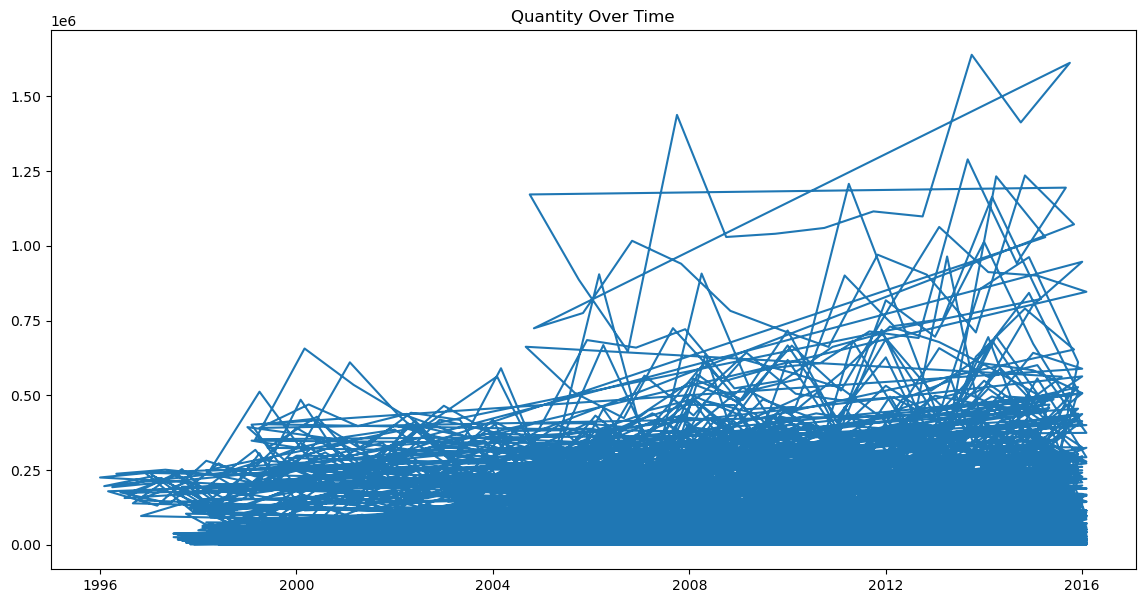

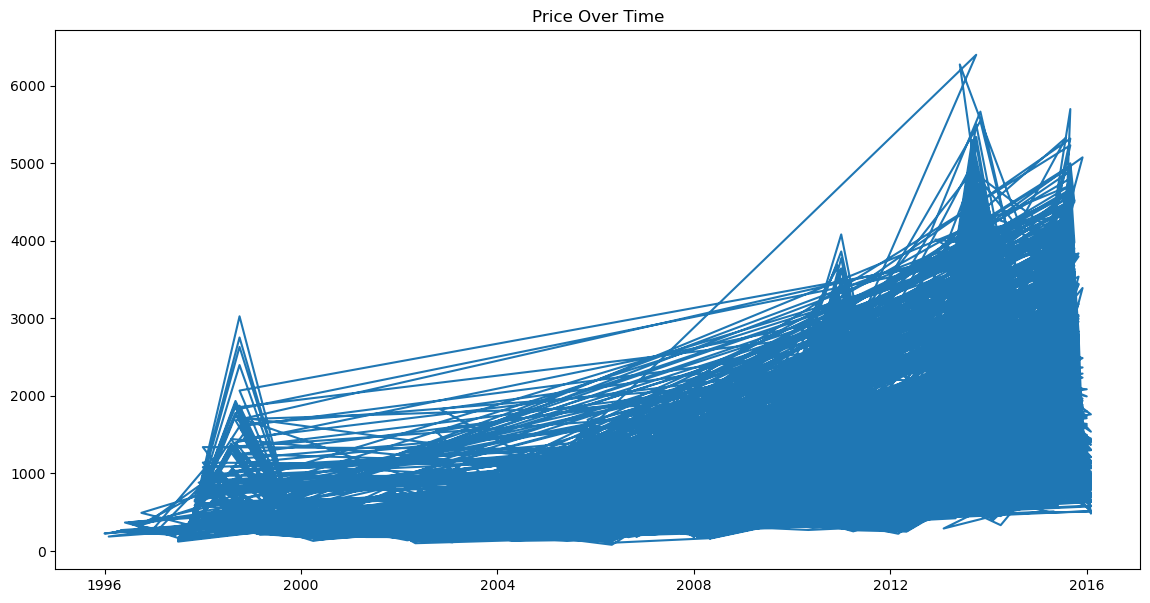

In [14]:
# Exploratory Data Analysis (EDA)
# Temporal Analysis

# Plot time series for quantity
plt.figure(figsize=(14, 7))
plt.plot(df['quantity'])
plt.title('Quantity Over Time')
plt.show()

# Plot time series for price
plt.figure(figsize=(14, 7))
plt.plot(df['priceMod'])
plt.title('Price Over Time')
plt.show()

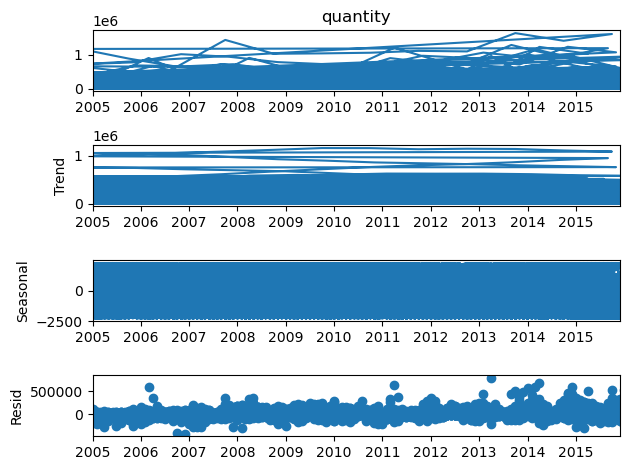

In [15]:
#Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['quantity'], model='additive', period=12)
decomposition.plot()
plt.show()

In [17]:
#Feature Engineering
# Create Lagged Features

df['quantity_lag1'] = df['quantity'].shift(1)
df['priceMod_lag1'] = df['priceMod'].shift(1)
df.dropna(inplace=True)


In [18]:
#Rolling Statistics

# Create rolling mean and standard deviation
df['quantity_roll_mean'] = df['quantity'].rolling(window=3).mean()
df['quantity_roll_std'] = df['quantity'].rolling(window=3).std()

In [19]:
#Seasonal Indicators

# Create month and quarter features
df['month'] = df.index.month
df['quarter'] = df.index.quarter

In [20]:
# Model Selection and Training
# Train-Test Split

# Split the data into training and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [21]:
# Baseline Model (ARIMA)

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train['quantity'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                 8180
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -102076.883
Date:                Sat, 25 May 2024   AIC                         204165.766
Time:                        21:47:51   BIC                         204207.822
Sample:                             0   HQIC                        204180.145
                               - 8180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5274      0.004   -135.271      0.000      -0.535      -0.520
ar.L2         -0.3237      0.005    -70.331      0.000      -0.333      -0.315
ar.L3         -0.1598      0.005    -31.799      0.0

C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


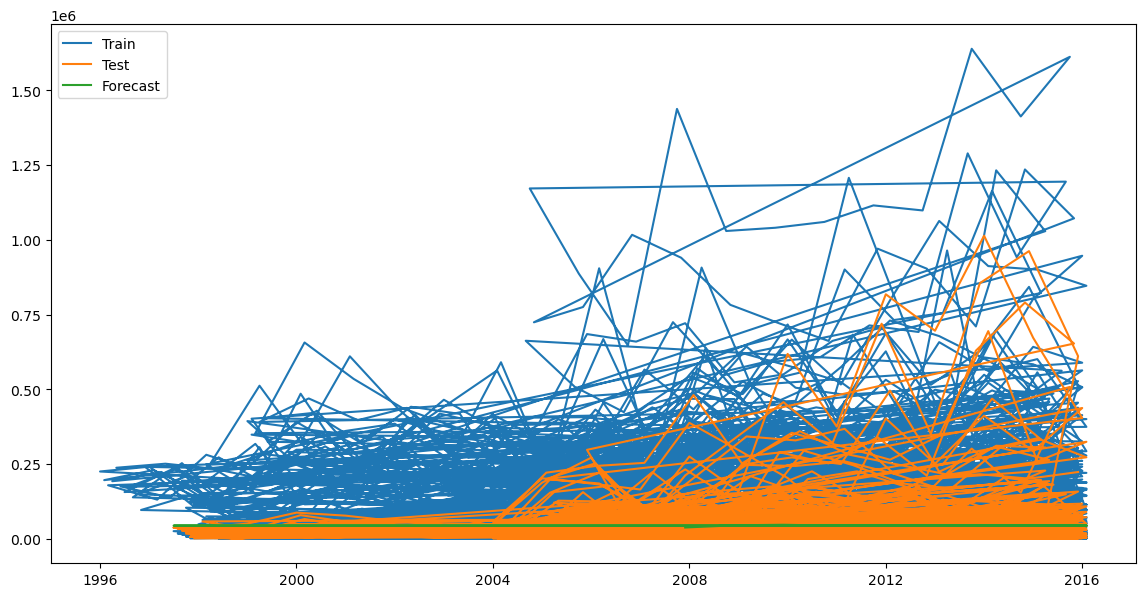

In [22]:
# Forecasting with ARIMA

# Forecast
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['quantity'], label='Train')
plt.plot(test.index, test['quantity'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [31]:
# Model Evaluation
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(test['quantity'], forecast[:len(test)])
mse = mean_squared_error(test['quantity'], forecast[:len(test)])
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 44609.91377997707, MSE: 7257035144.819942, RMSE: 85188.23360546891


In [34]:
! pip install pmdarima

In [35]:
 # Fine-tuning and Validation
# Hyperparameter Tuning

# Example of hyperparameter tuning with grid search for ARIMA
from pmdarima import auto_arima

# Fit auto_arima to find the best parameters
stepwise_model = auto_arima(df['quantity'], start_p=1, start_q=1,
                            max_p=3, max_q=3, seasonal=True,
                            stepwise=True, trace=True)

print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=254612.798, Time=1.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=257164.566, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255489.509, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=254743.100, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=257162.567, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=254529.356, Time=2.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=254980.635, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=254495.092, Time=2.90 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=254896.147, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=254487.991, Time=4.78 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=254508.435, Time=3.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=254474.909, Time=8.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=254488.714, Time=5.02 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=254472.808, Time=7.64 sec
 ARIM

In [36]:
# Cross-validation

from sklearn.model_selection import TimeSeriesSplit

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    model = ARIMA(train['quantity'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    print(mean_absolute_error(test['quantity'], forecast))

C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-

58456.091147089166


C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-

38901.661797855944


C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Li

148947.6348269668


C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\india\anaconda3\Li

78927.26548341123
48695.65058656575


C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
# Deployment
# Save the Model

import joblib

# Save the model to a file
joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']

In [39]:
# Load and Use the Model

# Load the model from a file
loaded_model = joblib.load('arima_model.pkl')
# Predict future values
future_forecast = loaded_model.forecast(steps=12)
print(future_forecast)

8521    5377.877674
8522    5839.146100
8523    5337.363667
8524    5326.831339
8525    4813.531225
8526    5111.465468
8527    5141.609101
8528    5175.070161
8529    5179.546755
8530    5179.617017
8531    5131.296837
8532    5147.226528
Name: predicted_mean, dtype: float64


C:\Users\india\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Conclusion
This notebook provides a comprehensive framework for developing a robust time series forecasting model for market trends. By following the outlined steps, you can preprocess data, conduct EDA, engineer features, select and train models, evaluate performance, fine-tune, and finally deploy the model